## BUTTER Access Example using Python data_utils module (PyArrow and S3FS)

We provide a function `data_utils.read_pandas` which takes a sweep name, list of filters in PyArrow Parquet format [documentation](https://arrow.apache.org/docs/python/generated/pyarrow.parquet.ParquetDataset.html)), and a list of columns.

This function uses an environment variable `DMP_DATA_DIR` to determine where to load the data from. Supported path strings are either local unix-like file-paths (e.g. `/home/data/butter`) or an S3 path (e.g. `s3://oedi-data-lake/butter`) If the environment variable is not set, then the code will automatically use the OEDI Data Lake.

In [1]:
import data_utils
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%%time

df = data_utils.read_pandas(
        sweep='primary_sweep_summary',
        filters=[
            ('dataset', 'in', ["201_pol", "537_houses", "mnist", "connect_4", "sleep"]),
            ('shape', '==', 'rectangle'),
            ('depth', '==', 5)],
        columns = [
            "test_loss_median",
            "experiment_id",
            "num_free_parameters",
            "dataset",
            "epochs",
            "size"
    ])

CPU times: user 664 ms, sys: 174 ms, total: 839 ms
Wall time: 5.88 s


We can inspect the format of the data:

In [3]:
df.head()

,test_loss_median,experiment_id,num_free_parameters,dataset,epochs,size
0,"[1.1571984, 1.0480272, 0.8358843, 0.6152145, 0...",2034688,4197155,201_pol,3000,4194304
1,"[2.1345997, 1.4075481, 1.2010565, 1.1670822, 1...",2042744,65435,201_pol,3000,65536
2,"[1.1051655, 0.9162257, 0.6005205, 0.4830591, 0...",2046447,16777181,201_pol,3000,16777216
3,"[1.1646081, 1.0808125, 0.9431104, 0.71189445, ...",2048285,2095723,201_pol,3000,2097152
4,"[1.1302289, 0.9891485, 0.6911666, 0.5377671, 0...",2066434,8384951,201_pol,3000,8388608


Here, we use another function frmo data_utils, `extract_data` to expand the data frame into long-format and clean up the data before plotting.

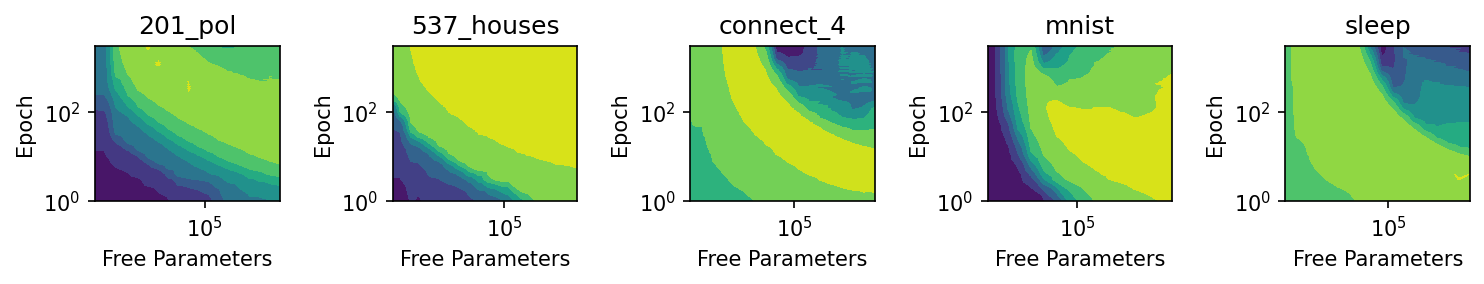

In [4]:
plot_df = data_utils.extract_data(df, grouper="dataset").dropna()

plt.figure(figsize=(10,2), dpi=150)

i = 1
for dataset,gdf in plot_df.groupby("dataset"):
    plt.subplot(1,5,i)
    plt.tricontourf(gdf["num_free_parameters"],
                    gdf["epoch"],
                    -np.log1p(gdf["test_loss_median"]))
    plt.yscale("log")
    plt.ylabel("Epoch")
    plt.xscale("log")
    plt.xlabel("Free Parameters")
    plt.title(dataset)
    i+=1

plt.tight_layout()
plt.show()